In [2]:
library(Seurat)
library(SeuratData)
library(cowplot)
library(dplyr)
library(SeuratDisk)

Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used

## Run the SEURAT nearest neighbors tutorial

In [4]:
bm <- LoadData(ds = "bmcite")

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

In [5]:
bm$wknn <- NULL
bm$wsnn <- NULL
bm$spca<- NULL

In [6]:
bm

An object of class Seurat 
17034 features across 30672 samples within 2 assays 
Active assay: RNA (17009 features, 2000 variable features)
 1 other assay present: ADT

In [7]:
DefaultAssay(bm) <- 'RNA'
bm <- NormalizeData(bm) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA()

DefaultAssay(bm) <- 'ADT'
# we will use all ADT features for dimensional reduction
# we set a dimensional reduction name to avoid overwriting the 
VariableFeatures(bm) <- rownames(bm[["ADT"]])
bm <- NormalizeData(bm, normalization.method = 'CLR', margin = 2) %>% 
  ScaleData() %>% RunPCA(reduction.name = 'apca')

Centering and scaling data matrix

PC_ 1 
Positive:  TRBC1, LAT, CD8B, CCL5, KLRB1, IGKC, S100A12, GZMA, S100A8, S100A9 
	   MS4A1, S100B, GNLY, CST7, TYROBP, KLRD1, RP11-291B21.2, NKG7, VCAN, CD14 
	   IGLC2, CCL4, AC092580.4, FCN1, IGLC3, PRF1, RBP7, SERPINA1, DUSP2, JUN 
Negative:  KIAA0101, TYMS, KLF1, KCNH2, FAM178B, APOC1, CNRIP1, CENPU, GATA1, BIRC5 
	   CENPF, EPCAM, CKS2, RP11-620J15.3, TUBA1B, TFR2, CA1, HMGA1, STMN1, HIST1H4C 
	   CDT1, AHSP, TOP2A, TK1, GFI1B, TUBB, MKI67, NME4, SMIM1, TMEM56 
PC_ 2 
Positive:  RPL3, RPS3, RPS18, RPS5, RPS4X, RPSA, RPS12, RPS23, RPS2, EEF1B2 
	   RPL4, LDHB, NPM1, RPS17, RPLP0, TRBC1, LAT, RPL7A, GYPC, HSPA8 
	   CD8B, KLRB1, CCL5, HNRNPA1, PEBP1, RPL37A, MYC, NUCB2, SOD1, CD79A 
Negative:  LYZ, FCN1, CST3, TYROBP, S100A9, LST1, S100A8, CSTA, MNDA, VCAN 
	   LGALS1, AIF1, S100A12, CFD, SERPINA1, FCER1G, MS4A6A, FOS, S100A6, CD14 
	   LGALS2, FTH1, GAPDH, ANXA2, CD36, CPVL, RBP7, HLA-DRA, LINC01272, H3F3A 
PC_ 3 
Positive:  CD74, HLA-DRA, HL

In [8]:
bm <- FindMultiModalNeighbors(
  bm, reduction.list = list("pca", "apca"), 
  dims.list = list(1:30, 1:18), modality.weight.name = "RNA.weight"
)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Warning message in FindMultiModalNeighbors(bm, reduction.list = list("pca", "apca"), :
“The number of provided modality.weight.name is not equal to the number of modalities. RNA.weight ADT.weight are used to store the modality weights”
Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



In [10]:
bm

An object of class Seurat 
17034 features across 30672 samples within 2 assays 
Active assay: ADT (25 features, 25 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, apca

In [11]:
bm <- RunUMAP(bm, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
bm <- FindClusters(bm, graph.name = "wsnn", algorithm = 3, resolution = 2, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:44:17 UMAP embedding parameters a = 0.9922 b = 1.112

18:44:18 Commencing smooth kNN distance calibration using 1 thread

18:44:19 Initializing from normalized Laplacian + noise

18:44:21 Commencing optimization for 200 epochs, with 983534 positive edges

18:45:02 Optimization finished



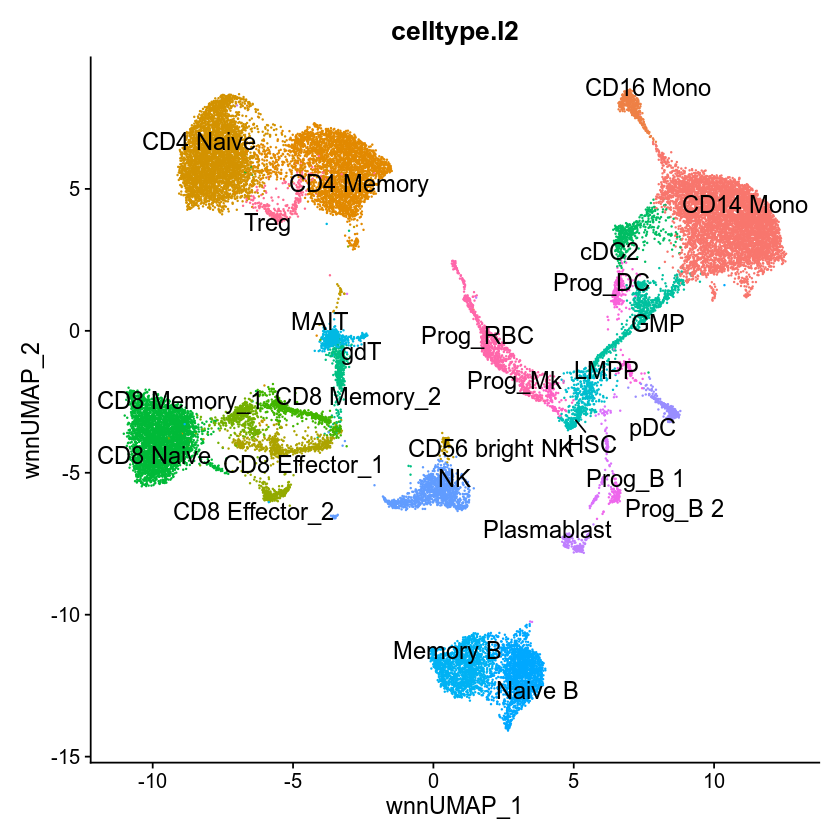

In [15]:
p1 <- DimPlot(bm, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 5) + NoLegend()
p2 <- DimPlot(bm, reduction = 'wnn.umap', group.by = 'celltype.l2', label = TRUE, repel = TRUE, label.size = 5) + NoLegend()
p2

## Output h5ad files containing nearest neighbor graphs

In [ ]:
idx <- attr(bm[["ADT_KNN20"]], 'nn.idx')
dist <- attr(bm[["ADT_KNN20"]], 'nn.dist')
nrows <- dim(idx)[1]
ncols <- dim(idx)[2]
ivals  <- rep(NA, nrows*ncols)
jvals <- rep(NA, length(ivals))
vals <- rep(NA, length(ivals))
count <- 1
for (i in 1:dim(idx)[1]){
  for (j in 1:dim(idx)[2]){
      ivals[count] <- i
      jvals[count] <- idx[i,j]
      vals[count] <- dist[i,j]
      count <- count +1
  }
}

X <- sparseMatrix(i=ivals, j=jvals, x=vals, dims=c(nrows, nrows))
rownames(X) <- colnames(bm)
colnames(X) <- colnames(bm)
X <- as.Graph(X)
DefaultAssay(object = X) <- "ADT"
bm[["ADT_nn"]] <- X


In [ ]:
idx <- attr(bm[["RNA_KNN20"]], 'nn.idx')
dist <- attr(bm[["RNA_KNN20"]], 'nn.dist')
nrows <- dim(idx)[1]
ncols <- dim(idx)[2]
ivals  <- rep(NA, nrows*ncols)
jvals <- rep(NA, length(ivals))
vals <- rep(NA, length(ivals))
count <- 1
for (i in 1:dim(idx)[1]){
  for (j in 1:dim(idx)[2]){
      ivals[count] <- i
      jvals[count] <- idx[i,j]
      vals[count] <- dist[i,j]
      count <- count +1
  }
}

X <- sparseMatrix(i=ivals, j=jvals, x=vals, dims=c(nrows, nrows))
rownames(X) <- colnames(bm)
colnames(X) <- colnames(bm)
X <- as.Graph(X)
DefaultAssay(object = X) <- "RNA"
bm[["RNA_nn"]] <- X


In [ ]:
bm[["wsnn"]]<-NULL
bm[["wknn"]]<-NULL


In [ ]:
DefaultAssay(bm) <- 'ADT'
SaveH5Seurat(bm, filename = "bm_adt.h5Seurat")
Convert("bm_adt.h5Seurat", dest = "h5ad")


In [ ]:
DefaultAssay(bm) <- 'RNA'
SaveH5Seurat(bm, filename = "bm_rna.h5Seurat")
Convert("bm_rna.h5Seurat", dest = "h5ad")

In [ ]:
idx <- attr(knn200[[1]], 'nn.idx')
dist <- attr(knn200[[1]], 'nn.dist')
nrows <- dim(idx)[1]
ncols <- dim(idx)[2]
ivals  <- rep(NA, nrows*ncols)
jvals <- rep(NA, length(ivals))
vals <- rep(NA, length(ivals))
count <- 1
for (i in 1:dim(idx)[1]){
  for (j in 1:dim(idx)[2]){
      ivals[count] <- i
      jvals[count] <- idx[i,j]
      vals[count] <- dist[i,j]
      count <- count +1
  }
}

X <- sparseMatrix(i=ivals, j=jvals, x=vals, dims=c(nrows, nrows))
rownames(X) <- colnames(bm)
colnames(X) <- colnames(bm)
X <- as.Graph(X)
DefaultAssay(object = X) <- "RNA"
bm[["RNA_nn_200"]] <- X


In [ ]:
DefaultAssay(bm) <- 'RNA'
SaveH5Seurat(bm, filename = "bm_rna_200NN.h5Seurat")
Convert("bm_rna_200NN.h5Seurat", dest = "h5ad")

In [ ]:
idx <- attr(knn200[[2]], 'nn.idx')
dist <- attr(knn200[[2]], 'nn.dist')
nrows <- dim(idx)[1]
ncols <- dim(idx)[2]
ivals  <- rep(NA, nrows*ncols)
jvals <- rep(NA, length(ivals))
vals <- rep(NA, length(ivals))
count <- 1
for (i in 1:dim(idx)[1]){
  for (j in 1:dim(idx)[2]){
      ivals[count] <- i
      jvals[count] <- idx[i,j]
      vals[count] <- dist[i,j]
      count <- count +1
  }
}

X <- sparseMatrix(i=ivals, j=jvals, x=vals, dims=c(nrows, nrows))
rownames(X) <- colnames(bm)
colnames(X) <- colnames(bm)
X <- as.Graph(X)
DefaultAssay(object = X) <- "ADT"
bm[["ADT_nn_200"]] <- X


In [ ]:
DefaultAssay(bm) <- 'ADT'
SaveH5Seurat(bm, filename = "bm_adt_200NN.h5Seurat")
Convert("bm_adt_200NN.h5Seurat", dest = "h5ad")